---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}yr^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[$i.e., $N(t = 0) = N_0]$.


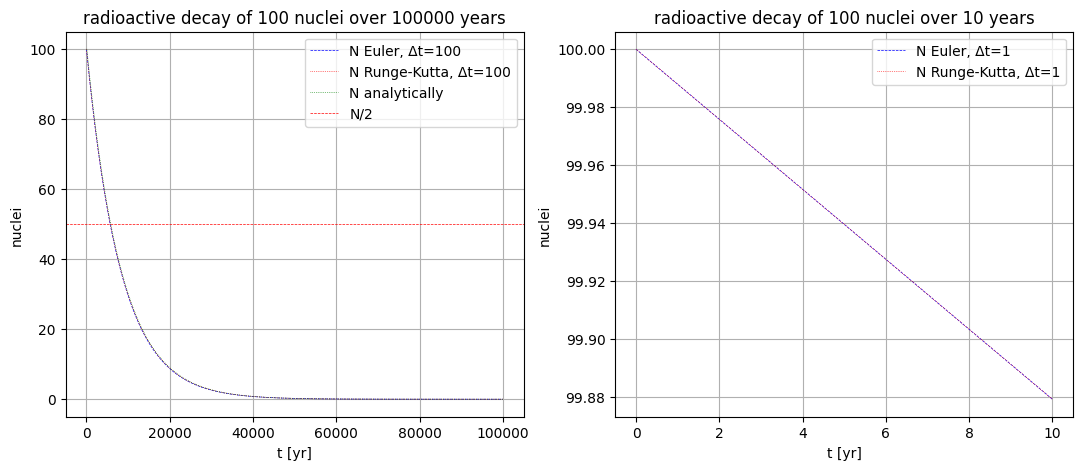

In [18]:
lamb = 1.21 * 10**(-4)
halflife = log(2)/lamb

from numpy import exp

def solveEuler( tMax, d, N0, Nlimit=None ):
  N= [ N0 ]
  T= [ 0 ]
  iterations= int( tMax / d )
  for n in range( iterations ):
    N.append( N[n] * ( 1 - d * lamb ) )
    T.append( T[n] + d )
    if Nlimit is not None and N[n] < Nlimit:
      break
  return T, N

def solveRunge( tMax, d, N0, Nlimit=None ):
  N= [ N0 ]
  T= [ 0 ]
  iterations= int( tMax / d )
  for n in range( iterations ):
    k1= -lamb * N[n]
    k2= -lamb * ( N[n] + (d/2) * k1 )
    N.append( N[n] + d * k2 )
    T.append( T[n] + d )
    if Nlimit is not None and N[n] < Nlimit:
      break
  return T, N

def solveExact( tMax, d, N0, Nlimit=None ):
  N= [ N0 ]
  T= [ 0 ]
  iterations= int( tMax / d )
  for n in range( iterations ):
    N.append ( N0 * exp( -lamb * n * d ) )
    T.append( T[n] + d )
    if Nlimit is not None and N[n] < Nlimit:
      break
  return T, N


fig, axs= plt.subplots( nrows=1, ncols=2, figsize=(13,5) )

tMax= 100000   # calculate for [yrs]
d= 100         # timestep [yrs]
N0= 100        # initial amount of nuclei
T, Neuler= solveEuler( tMax, d, N0 )
_, Nrunge= solveRunge( tMax, d, N0 )
_, Nexact= solveExact( tMax, d, N0 )

axs[0].set_title( f'radioactive decay of {N0} nuclei over {tMax} years' )
axs[0].set_xlabel( 't [yr]' )
axs[0].set_ylabel( 'nuclei' )
axs[0].plot( T, Neuler, color='blue', linewidth=0.5, linestyle='--', label=f'N Euler, Δt={d}' )
axs[0].plot( T, Nrunge, color='red', linewidth=0.5, linestyle=':', label=f'N Runge-Kutta, Δt={d}' )
axs[0].plot( T, Nexact, color='green', linewidth=0.5, linestyle=':', label=f'N analytically' )
axs[0].axhline( y=N0/2, color='red', linewidth=0.5, linestyle='--', label='N/2' ) 
axs[0].grid()
axs[0].legend()

tMax= 10   # calculate for [yrs]
d= 1         # timestep [yrs]
N0= 100        # initial amount of nuclei
T, Neuler= solveEuler( tMax, d, N0 )
_, Nrunge= solveRunge( tMax, d, N0 )

axs[1].set_title( f'radioactive decay of {N0} nuclei over {tMax} years' )
axs[1].set_xlabel( 't [yr]' )
axs[1].set_ylabel( 'nuclei' )
axs[1].plot( T, Neuler, color='blue', linewidth=0.5, linestyle='--', label=f'N Euler, Δt={d}' )
axs[1].plot( T, Nrunge, color='red', linewidth=0.5, linestyle=':', label=f'N Runge-Kutta, Δt={d}' )
axs[1].grid()
axs[1].legend()

plt.show()

#EOF


**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

In [19]:
tMax= 100000
d= 1
N0= 1000

_, Neuler= solveEuler( tMax, d, N0, Nlimit=N0/2 )
itEuler= len( Neuler ) / d
print( f'Euler: {itEuler}' )

_, Nrunge= solveRunge( tMax, d, N0, Nlimit=N0/2 )
itRunge= len( Nrunge ) / d
print( f'Runge: {itRunge}' )


Euler: 5731.0
Runge: 5731.0


## Exercise 2 - The motion of a pendulum

The differential equation describing the motion of a simple pendulum of length $l$ is

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \sin(\theta) \ , $$

where $g$ is the local acceleration of gravity (on Earth, $g = 9.8$ m/s$^2$). For this exercise, consider $l = 10$ m. Here we will consider the simple case in which the maximal displacement of the pendulum is small, so that we can use the approximation $\sin(\theta) \approx \theta$ and consider the following, simplified, equation:

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \theta \ . $$

This equation can be solved analytically, giving the following expression for $\theta(t)$:

$$ \theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{l}} \, t \right) \ .$$

**(A)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that at a time $t = 0$ the pendulum is at $\theta = 0.1$ radians, and it is not moving.


**(B)** What is the displacement ($\theta$) of the pendulum at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s in your ODE integrator? How different is the value you obtain from the true one (calculated with the above equation)? How small should the time step be, if you want to have a discrepancy of at most 0.01 in the value of $\theta(t = 20$ s$)$?

**(C)** Implement _**your own version**_ of the **Euler-Cromer and Runge Kutta (order 4) algorithms**, and solve the differential equation again by using these methods. How big is the discrepancy from the real solution for these methods, at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s?

In [20]:
g, l = 9.8,10

## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

<image src="6.3.a.png">

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

Substitution $y_1 = x$ und $y_2 = \frac{dx}{dt}$, damit kann man um-schreiben: $\frac{dy_1}{dt} = y_2$ und $\frac{dy_2}{dt} = -\frac{k}{m} y_1$ bzw. in Vektorform:
$$ \frac{d}{dt}
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
=
\begin{pmatrix}
y_2 \\
-\dfrac{k}{m} y_1
\end{pmatrix} $$

In [21]:
from scipy.integrate import solve_ivp

# Anfangsbedingungen
x0= 0.10
v0= 0.20

# gewählte Werte
m= 1.0
k= 4.0
omega= np.sqrt( k / m )

def f( t, y ):   # bei solve_ivp() vorgegebene Parameter!
  x= y[0]
  v= y[1]
  dxdt= v
  dvdt= -(k/m) * x
  return [ dxdt, dvdt ]

tStart= 0.0
tEnd= 10.0                             # etwa drei Schwingungen
T= np.linspace( tStart, tEnd, 1000 )   # 1000 Werte von tStart bis tEnd
#    solve_ivp( fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options )
sol= solve_ivp( f, (tStart,tEnd), [x0,v0], t_eval=T )
Tnumeric= sol.t     # t
Xnumeric= sol.y[0]  # erstes Element ist x(t)


#EOF

**(C)** Plot your solution and compare it to the analytical solution.

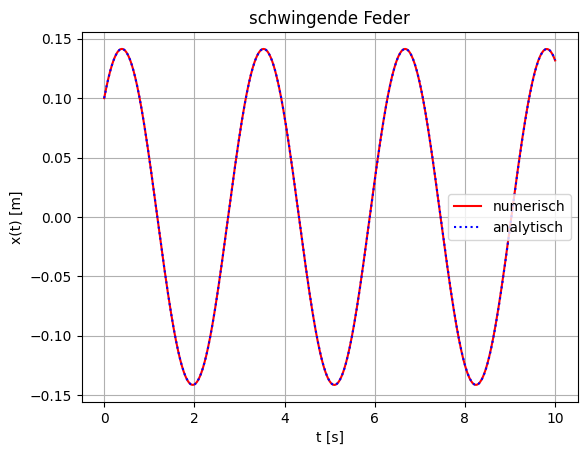

In [22]:
def fAnalytic( t ):
  return x0 * np.cos( omega * t ) + v0 * np.sqrt( m/k ) * np.sin( omega * t )

xAnalytic= fAnalytic( T )


plt.figure()
plt.plot( Tnumeric, Xnumeric, color='red', label='numerisch' )
plt.plot( T, xAnalytic, color='blue', linestyle=':', label="analytisch" )
plt.xlabel( 't [s]' )
plt.ylabel( 'x(t) [m]' )
plt.title( 'schwingende Feder' )
plt.legend()
plt.grid()
plt.show()